# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Auliyya Aini
- Email: auliyyaai@gmail.com
- Id Dicoding: Auliyya Aini

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [2]:
# Load dataset
file_path = 'D:\dashboard_datascience\data.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25044\1903547350.py:2: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'D:\dashboard_datascience\data.csv'


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Simpan data asli untuk digabung nanti
df_original = df.copy()

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Menampilkan jumlah missing value di setiap kolom
df.isnull().sum()


Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [13]:
# Menampilkan jumlah baris duplikat
df.duplicated().sum()

0

# EDA

**1. Distribusi Target: Status Mahasiswa (Lulus / Dropout)**

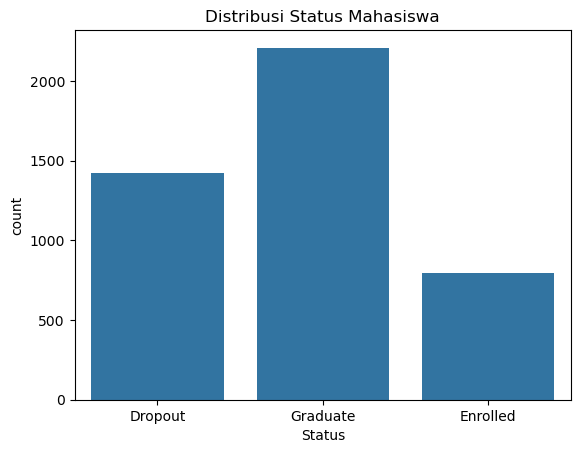

In [14]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Mahasiswa')
plt.show()

**2. Korelasi Fitur Akademik dengan Status**

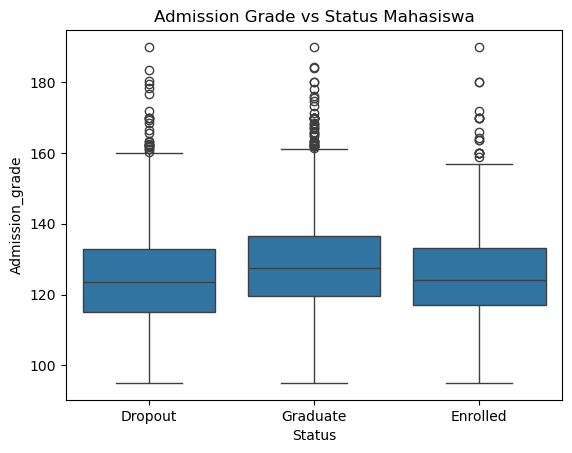

In [15]:
sns.boxplot(x='Status', y='Admission_grade', data=df)
plt.title('Admission Grade vs Status Mahasiswa')
plt.show()

**3. Pengaruh Jumlah Unit yang Tidak Lulus terhadap Dropout**

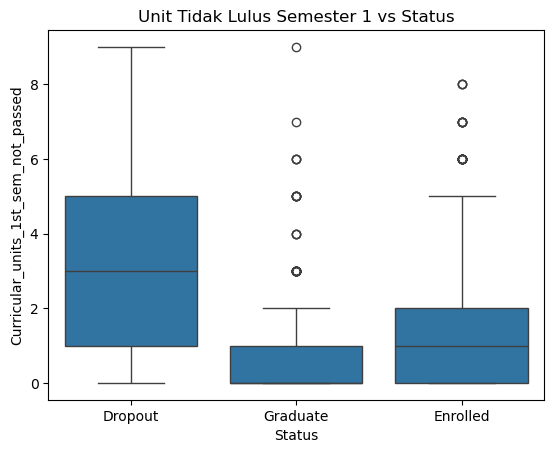

In [16]:
df['Curricular_units_1st_sem_not_passed'] = df['Curricular_units_1st_sem_enrolled'] - df['Curricular_units_1st_sem_approved']

sns.boxplot(x='Status', y='Curricular_units_1st_sem_not_passed', data=df)
plt.title('Unit Tidak Lulus Semester 1 vs Status')
plt.show()


**4. Usia saat Mendaftar terhadap Status**

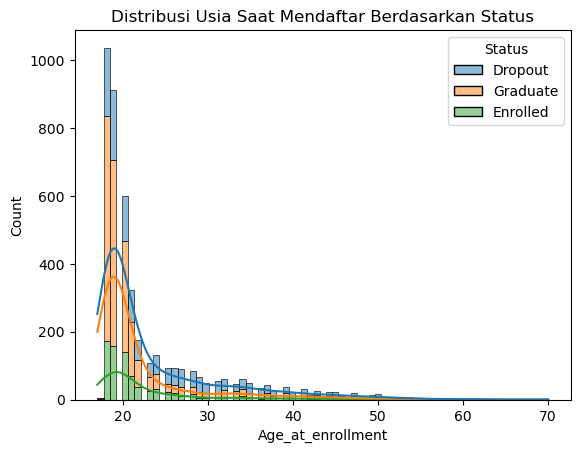

In [17]:
sns.histplot(data=df, x='Age_at_enrollment', hue='Status', kde=True, multiple="stack")
plt.title('Distribusi Usia Saat Mendaftar Berdasarkan Status')
plt.show()


**5. Jenis Kelamin dan Dropout**

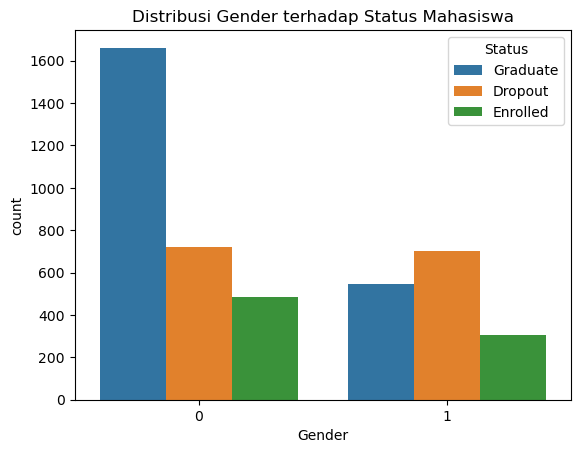

In [18]:
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Distribusi Gender terhadap Status Mahasiswa')
plt.show()

**6. Korelasi antar Fitur Numerik**

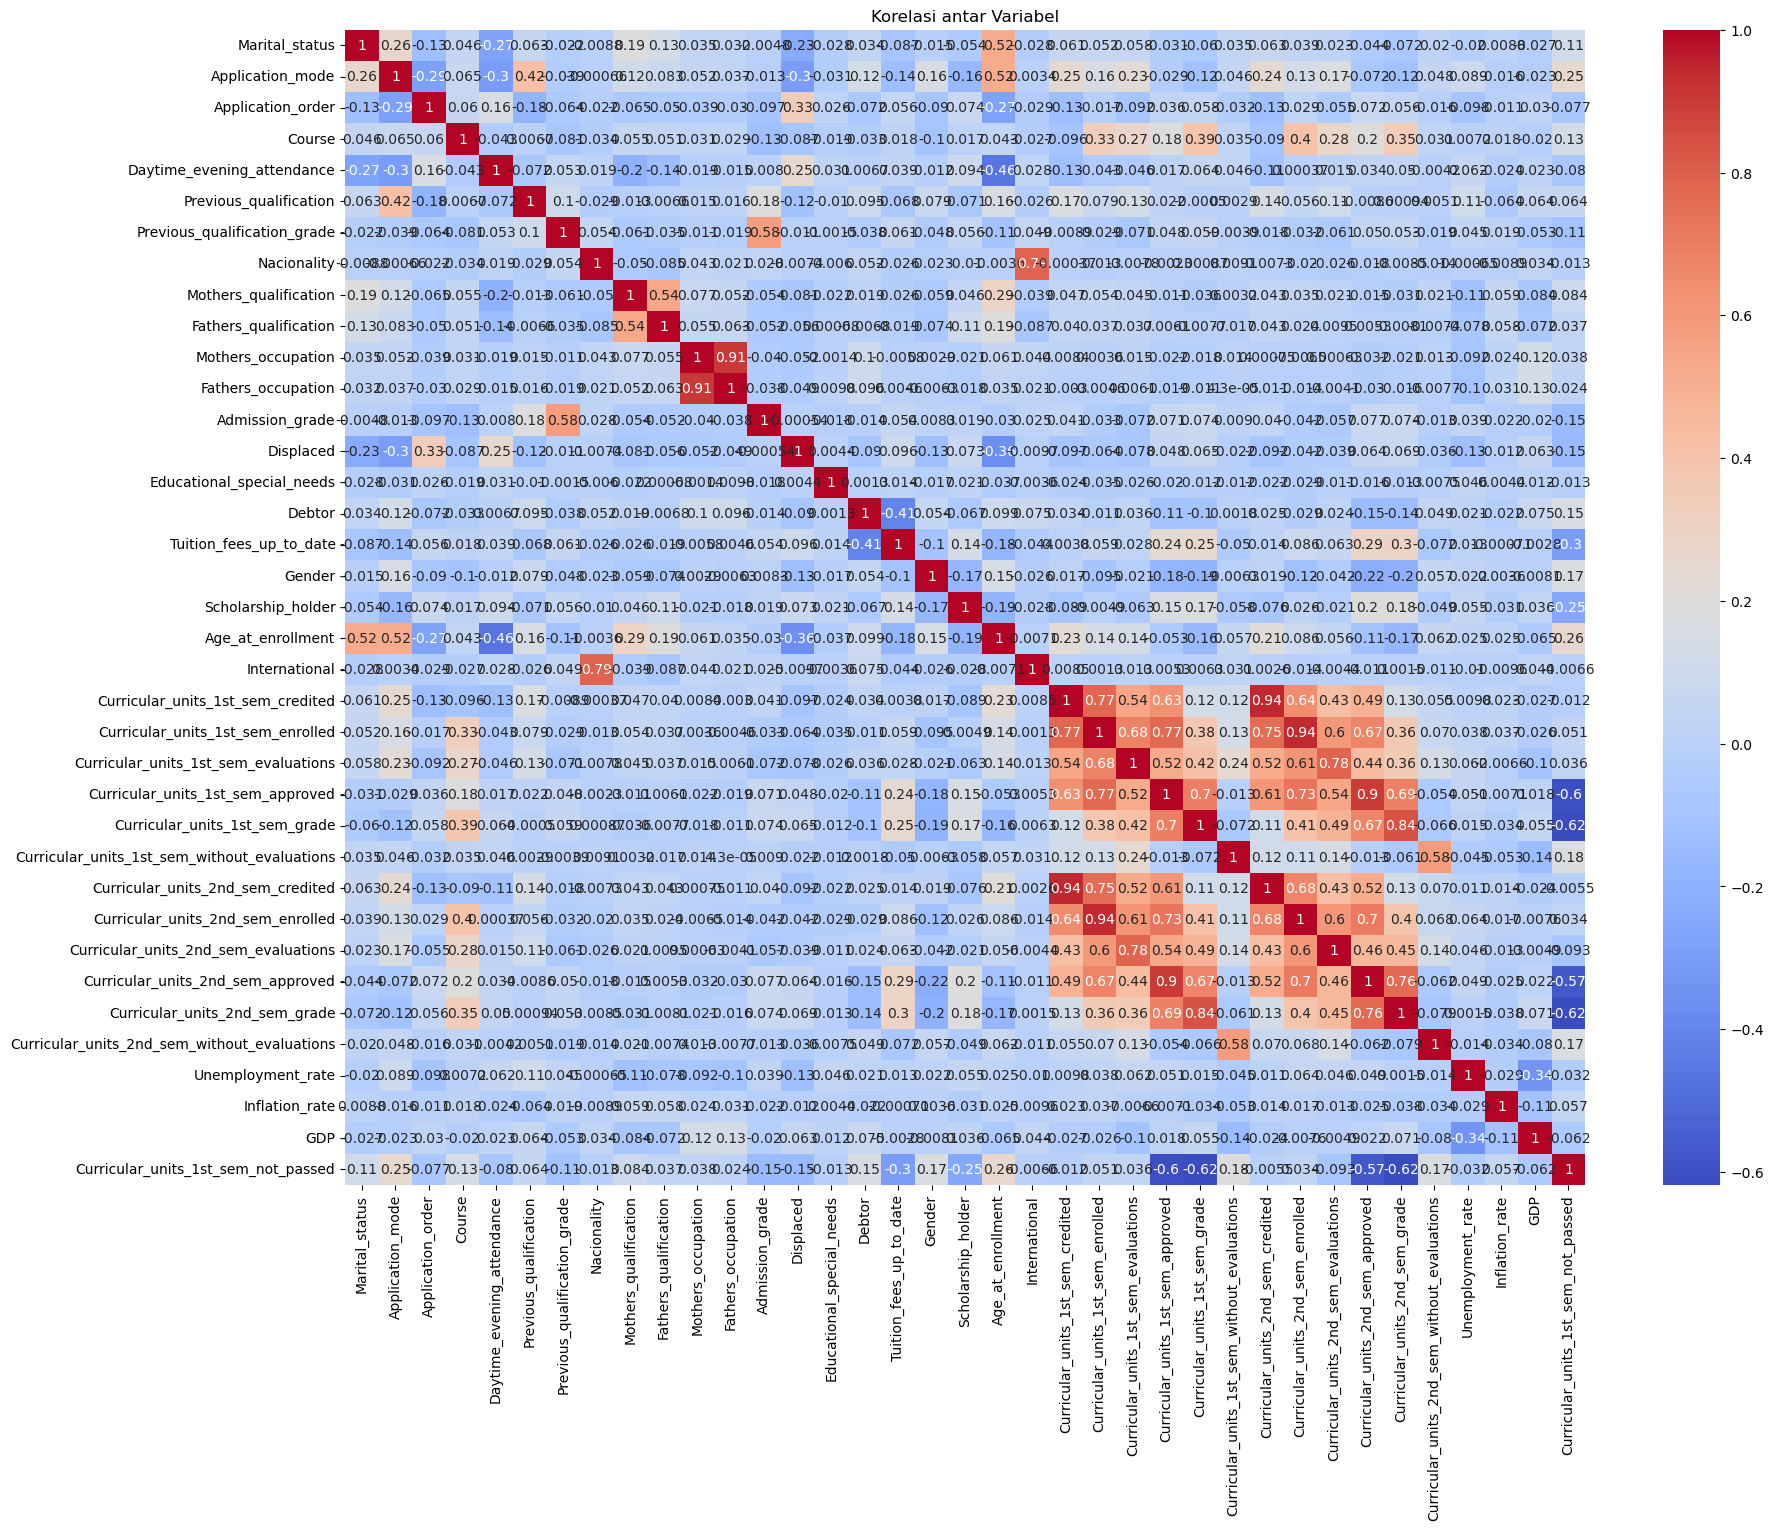

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel')
plt.show()

**7. Pairplot untuk Fitur Penting**

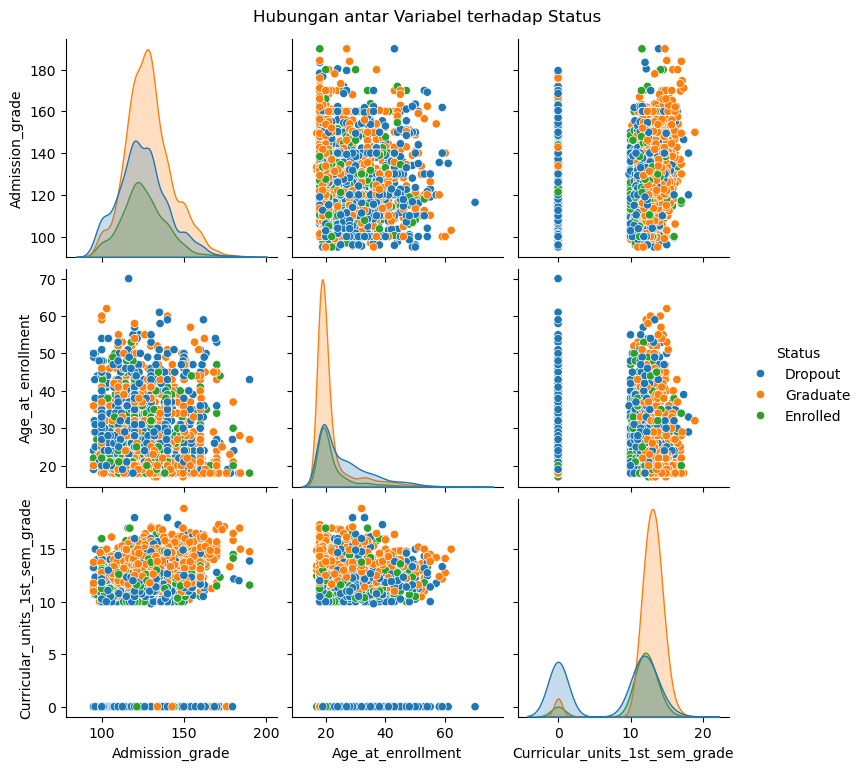

In [20]:
sns.pairplot(df[['Status', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_grade']], hue='Status')
plt.suptitle('Hubungan antar Variabel terhadap Status', y=1.02)
plt.show()

## Data Preparation / Preprocessing

In [21]:
# Menghapus duplikat jika ada
df.drop_duplicates(inplace=True)

In [22]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# untuk kolom 'Admission_grade'
df = remove_outliers_iqr(df, 'Admission_grade')

In [35]:
from sklearn.preprocessing import LabelEncoder

# Tentukan fitur kategorikal numerik secara eksplisit
categorical_numeric = [
    'Marital_status', 'Application_mode', 'Application_order',
    'Daytime_evening_attendance', 'Previous_qualification',
    'Previous_qualification_grade', 'Nacionality',
    'Mother_qualification', 'Father_qualification',
    'Mother_occupation', 'Father_occupation',
    'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International'
]

# Tentukan fitur numerik kontinu (yang akan discaling)
numeric_continuous = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                      if col not in categorical_numeric + ['Status']]

In [36]:
# Pisahkan fitur dan target
X = df.drop(columns=['Status'])
y = df['Status']

In [37]:
# Scaling hanya untuk kolom numerik
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_continuous] = scaler.fit_transform(X[numeric_continuous])

In [38]:
from sklearn.model_selection import train_test_split

# Stratified split agar distribusi kelas seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# Setelah train-test split
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)


In [41]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Class weights
classes = np.array(sorted(y_resampled.unique()))
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_resampled)
class_weights = dict(zip(classes, weights))
sample_weights = y_resampled.map(class_weights)


## Modeling

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
import xgboost as xg
from xgboost import XGBClassifier

# Buat sample_weight untuk y_train_smote
sample_weights = y_resampled.map(class_weights)

# Latih model XGBoost
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    learning_rate=0.05,
    n_estimators=300,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_resampled, y_resampled, sample_weight=sample_weights)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3, ...)

## Evaluation

Akurasi: 0.7800


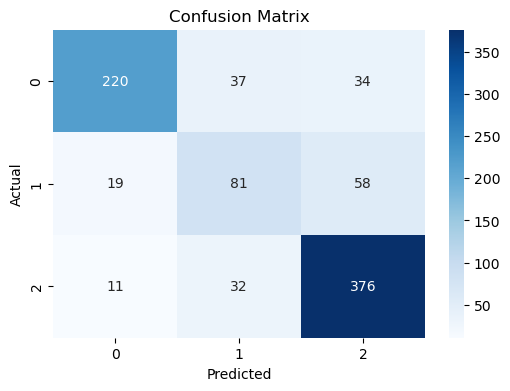

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       291
           1       0.54      0.51      0.53       158
           2       0.80      0.90      0.85       419

    accuracy                           0.78       868
   macro avg       0.74      0.72      0.73       868
weighted avg       0.78      0.78      0.78       868



In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg

# Prediksi
y_pred = xgb.predict(X_test)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


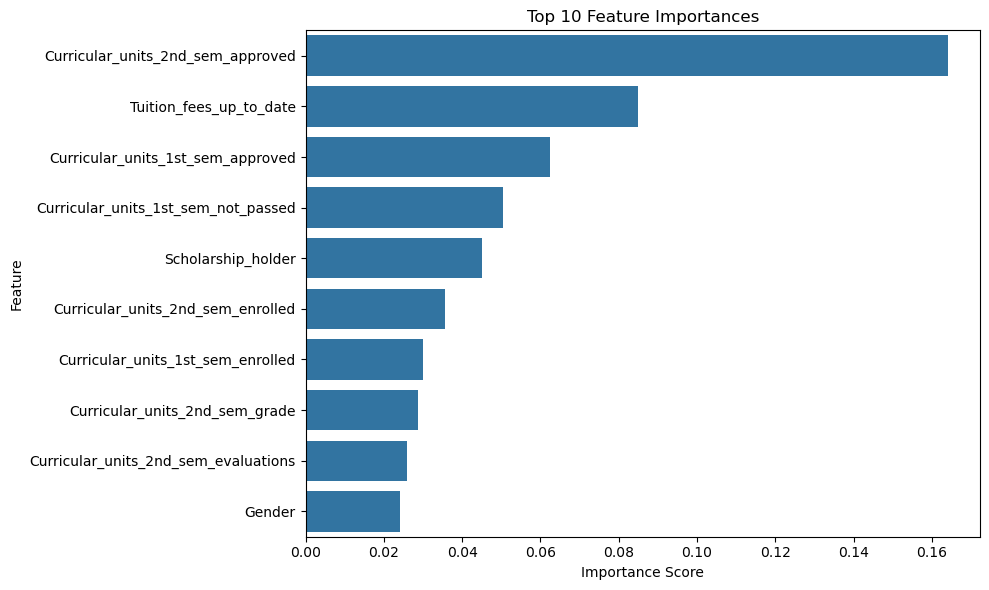

In [44]:
# Ambil feature importance
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Urutkan
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Visualisasi top 10 fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted.head(10), y=feature_importances_sorted.head(10).index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [46]:
# Simpan hasil prediksi (dengan inverse transform untuk numerik kontinu)
X_test_unscaled = X_test.copy()
X_test_unscaled[numeric_continuous] = scaler.inverse_transform(X_test[numeric_continuous])
results_df = X_test_unscaled.copy()
results_df['Actual_Status'] = y_test.reset_index(drop=True)
results_df['Predicted_Status'] = y_pred

# Mapping label
status_mapping = {0: "Enrolled", 1: "Dropout", 2: "Graduate"}
results_df['Actual_Status_Label'] = results_df['Actual_Status'].map(status_mapping)
results_df['Predicted_Status_Label'] = results_df['Predicted_Status'].map(status_mapping)

# Mapping tambahan (jika ada)
marital_map = {1: "Single", 2: "Married", 3: "Widow", 4: "Divorced"}
attendance_map = {1: "Daytime", 0: "Evening"}
binary_map = {0: "No", 1: "Yes"}

if 'Marital_status' in results_df:
    results_df["Marital_status_Label"] = results_df["Marital_status"].map(marital_map)
if 'Daytime_evening_attendance' in results_df:
    results_df["Attendance_Label"] = results_df["Daytime_evening_attendance"].map(attendance_map)
if 'Displaced' in results_df:
    results_df["Displaced_Label"] = results_df["Displaced"].map(binary_map)
if 'Educational_special_needs' in results_df:
    results_df["Special_needs_Label"] = results_df["Educational_special_needs"].map(binary_map)

# Simpan hasil
results_df.to_csv("data_prediction_results_labeled2.csv", index=False)

In [47]:
import joblib
import pandas as pd

# Simpan model XGBoost
joblib.dump(xgb, 'xgb_model.joblib')

# Simpan StandardScaler
joblib.dump(scaler, 'scaler.joblib')

# Simpan fitur yang digunakan (pastikan ini diambil dari hasil feature_importances_)
# Asumsikan feature_importances_sorted sudah berbentuk DataFrame/Series
top_10_features = feature_importances_sorted.head(10).index.tolist()

# Simpan semua fitur yang digunakan dalam pelatihan
all_features = X.columns.tolist()
joblib.dump(all_features, 'all_features.joblib')

['all_features.joblib']